# Analyse Track Data

Plot distributions of metrics from track data exported by TrackMate

We begin by importing the necessary packages:

In [25]:
import glob
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Specify the location of the exported TrackMate data and read it using pandas, to provide DataFrames:

In [26]:
METRIC_OF_INTEREST = 'TRACK_MEAN_SPEED'
INPUT_DIR = 'C:/Users/barryd/Downloads/Demo_Data/TrackMate_outputs'
valid_input = False

if os.path.exists(INPUT_DIR):
    print(f'{INPUT_DIR} is a valid directory - well done you!')
    valid_input = True
else:
    print(f'{INPUT_DIR} does not exist - check that the path is correct')

C:/Users/barryd/Downloads/Demo_Data/TrackMate_outputs is a valid directory - well done you!


Identify CSV files in input directory - check that some were actually found:

In [27]:
if valid_input:
    file_paths = glob.glob(f'{INPUT_DIR}/Pos*/*_Pos*_tracks.csv')
    
    print(f'{len(file_paths)} valid CSV files found in {INPUT_DIR}')
    
    if len(file_paths) < 1:
        print(f'Are you sure {INPUT_DIR} is the folder that contains your TrackMate data?')
    
    position_labels = []
    datasets = []
    
    # Regex to extract position number from file name
    position_pattern = re.compile(r'_Pos(\d+)_')
else:
    print(f'{INPUT_DIR} does not exist - check that the path is correct')

2 valid CSV files found in C:/Users/barryd/Downloads/Demo_Data/TrackMate_outputs


Load data from CSV files:

In [28]:
for file_path in file_paths:
    # Extract position number from file name
    match = position_pattern.search(file_path)
    position_num = -1
    if match:
        position_num = int(match.group(1))
        position_labels.append(position_num)

    data = pd.read_csv(file_path, skiprows=[1, 2, 3])
    datasets.append(data[METRIC_OF_INTEREST].values)

Use matplotlib to generate a histogram:

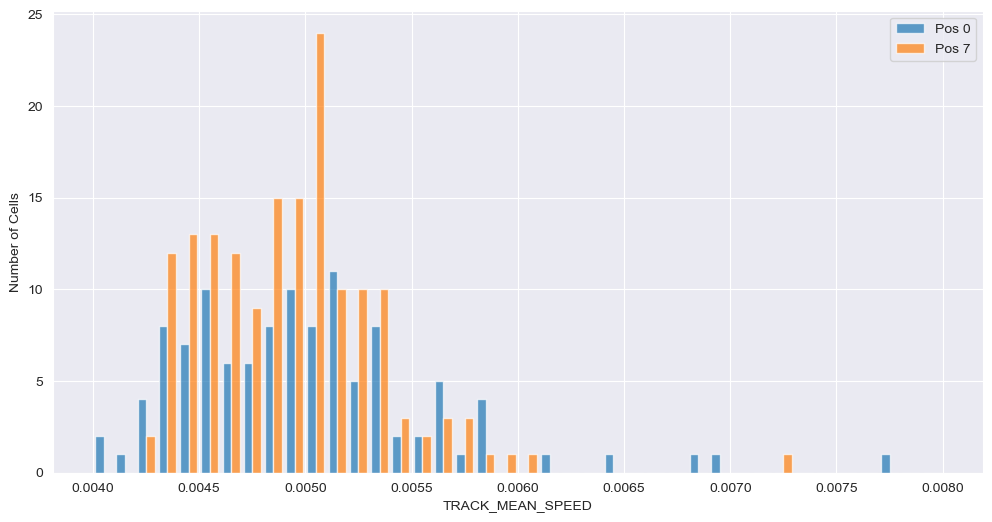

In [29]:
if len(datasets) > 0:
    %matplotlib inline
    plt.figure(figsize=(12, 6))
    
    plt.hist(datasets, bins=40, range=(0.004, 0.008), alpha=0.7,
             label=[f'Pos {pos}' for pos in position_labels])
    plt.xlabel(METRIC_OF_INTEREST)
    plt.ylabel("Number of Cells")
    plt.legend()
    plt.show()
else:
    print('No data was found in the cells above - there''s nothing to plot!')

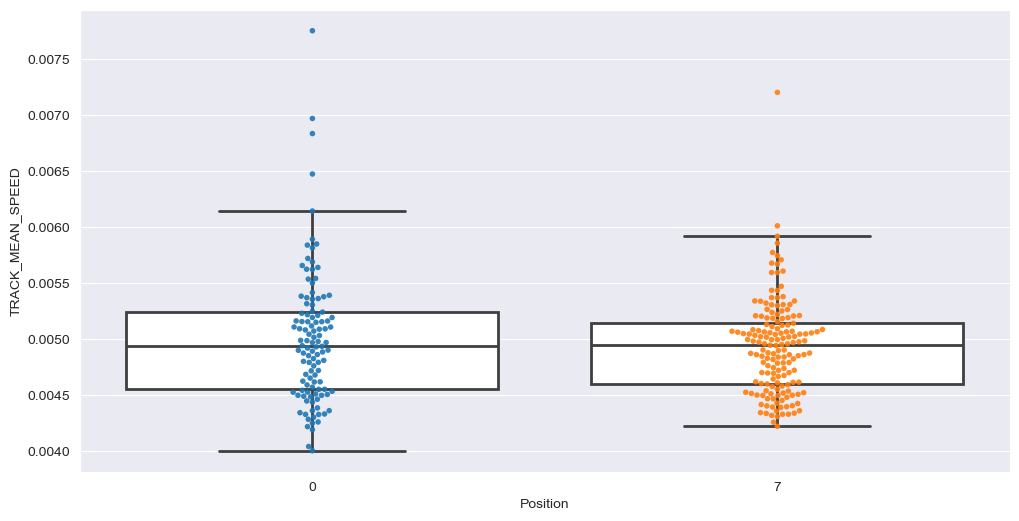

In [30]:
if len(datasets) > 0:
    # Boxplot and Swarmplot
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(data=datasets, color='white', showfliers=False, ax=ax, linewidth=2)
    sns.swarmplot(data=datasets, size=4, alpha=0.9, ax=ax)
    
    # Set the ticks and labels
    ax.set_xticks(range(len(position_labels)))  # Ensure the number of ticks matches the number of labels
    ax.set_xticklabels(position_labels)
    
    ax.set_ylabel(METRIC_OF_INTEREST)
    ax.set_xlabel('Position')
    plt.show()
else:
    print('No data was found in the cells above - there''s nothing to plot!')